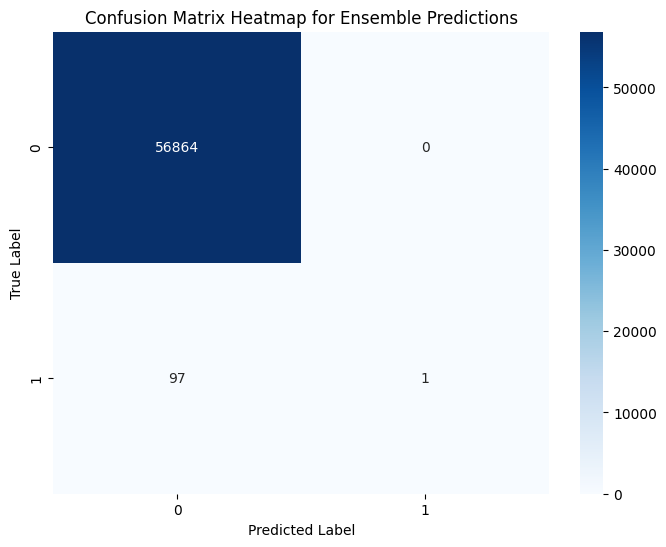

Individual Model Accuracies:
Isolation Forest Accuracy: 0.0378
Random Forest Accuracy: 0.9996
XGBoost Accuracy: 0.9996
AdaBoost Accuracy: 0.9993
Ensemble Accuracy: 0.9983


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.svm import OneClassSVM
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/creditcard.csv')

# Preprocessing
X = data.drop('Class', axis=1)
y = data['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model training
if_model = IsolationForest(random_state=42)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)

if_model.fit(X_train_scaled)
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
ada_model.fit(X_train_scaled, y_train)

# Model predictions
if_predictions = if_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)
xgb_predictions = xgb_model.predict(X_test_scaled)
ada_predictions = ada_model.predict(X_test_scaled)

# Ensemble predictions
ensemble_predictions = ((if_predictions == 1) & (rf_predictions == 1) & (xgb_predictions == 1) & (ada_predictions == 1))

# Calculate accuracy for each individual model
if_accuracy = accuracy_score(y_test, (if_predictions == 1).astype(int))
rf_accuracy = accuracy_score(y_test, rf_predictions)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
ada_accuracy = accuracy_score(y_test, ada_predictions)
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)

# Calculate confusion matrix for ensemble predictions
conf_matrix_ensemble = confusion_matrix(y_test, ensemble_predictions)

# Plot confusion matrix heatmap for ensemble predictions
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_ensemble, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap for Ensemble Predictions')
plt.show()

print("Individual Model Accuracies:")
print(f"Isolation Forest Accuracy: {if_accuracy:.4f}")
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print(f"XGBoost Accuracy: {xgb_accuracy:.4f}")
print(f"AdaBoost Accuracy: {ada_accuracy:.4f}")
print(f"Ensemble Accuracy: {ensemble_accuracy:.4f}")